# Tarea 2 - Deep Learning

## Alumno: Amadeo Gustavo Ancarani

### Tarea Planteada:

* Usando el dataset CIFAR 100:
  - Implementar una red convolucional con las optimizaciones vistas en clase para obtener el mejor score posible.


##### 00 - Importo las librerias



In [6]:
import matplotlib.pyplot as plt
from tensorflow.python.keras.callbacks import LearningRateScheduler
import tensorflow as tf
from tensorflow.keras import backend as K


def show_history(history, metrics=['accuracy']):
    """
    Visualize history
    :param history:
    :return:
    """

    # Plot history: Loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss history')
    plt.ylabel('Loss value')
    plt.xlabel('No. epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    for metric in metrics:
        # Plot history:
        plt.plot(history.history[metric])
        plt.plot(history.history['val_' + metric])
        plt.title(metric + ' history')
        plt.ylabel(metric + ' value (%)')
        plt.xlabel('No. epoch')
        plt.legend(['train', 'validation'], loc='upper left')
        plt.show()


def step_decay(epochs_drop):
    def step_decay_fun(epoch):
        initial_lrate = 0.001
        drop = 0.000001
        lrate = initial_lrate * tf.math.pow(drop, tf.math.floor((1+epoch)/epochs_drop))
        return lrate
    return step_decay_fun


def r2_keras(y_true, y_pred):
    """
    Custom R2-score metrics for keras backend
    :param y_true: valor real
    :type y_true: Tensor
    :param y_pred: valor predicho
    :type y_pred: Tensor
    :return: r2 score
    :rtype: tensor
    """
    ss_res = K.sum(K.square(y_true - y_pred))
    ss_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - ss_res / (ss_tot + K.epsilon())

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, Input, regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.metrics import AUC
from tensorflow.keras.losses import SparseCategoricalCrossentropy, MSE, MAE
import tensorflow as tf
#from aux_func import show_history, r2_keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from time import time
from tensorflow.keras.layers import Dropout

In [8]:
from tensorflow.keras.datasets import cifar100

(X_train_cifar100, y_train_cifar100), (X_validation_cifar100, y_validation_cifar100) = cifar100.load_data()
X_train_cifar100 = X_train_cifar100/255
X_validation_cifar100 = X_validation_cifar100/255

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print('Número de elementos en el dataset = ',X_train_cifar100.shape[0]+X_validation_cifar100.shape[0])

Número de elementos en el dataset =  60000


In [9]:
len(y_train_cifar100)

50000

# Modelo 1

In [16]:
# capas de la red
input = Input(shape=(32,32,3))
layer = input
layer = Conv2D(filters=20, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
layer = MaxPooling2D((2, 2))(layer)
layer = Conv2D(filters=40, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
layer = MaxPooling2D((2, 2))(layer)
layer = Conv2D(filters=60, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
layer = MaxPooling2D((2, 2))(layer)
layer = Flatten()(layer)
layer = Dense(units=50, activation='relu')(layer)
output = Dense(units=100, activation='softmax')(layer)

# creamos el modelo
model = Model(inputs=input, outputs=output)
print(model.summary())

# optimizador
optimizer = Adam(learning_rate=0.001)

# función loss
loss = SparseCategoricalCrossentropy(from_logits=False)

# métrica
metrics = ['accuracy']

# compilamos el modelo
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

history = model.fit(x=X_train_cifar100, y=y_train_cifar100, batch_size=50, epochs=20,
                    validation_data=(X_validation_cifar100, y_validation_cifar100))

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 20)        560       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 20)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 40)        7240      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 40)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 60)          2166

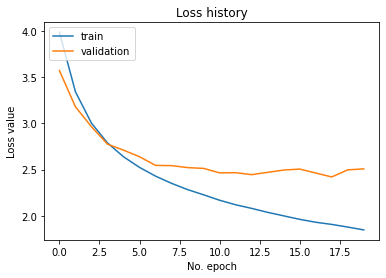

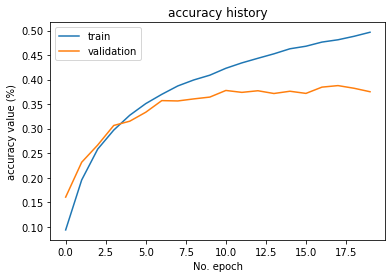

In [17]:
show_history(history)

# Modelo 2: Añado una capa

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 20)        560       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 20)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 40)        7240      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 40)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 60)          2166

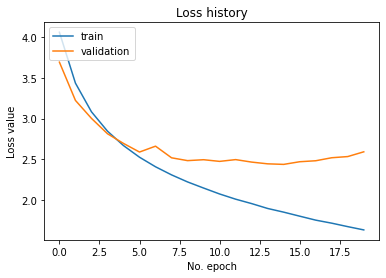

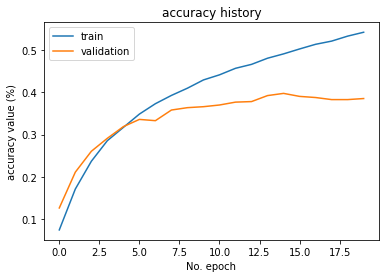

In [5]:
# capas de la red
input = Input(shape=(32,32,3))
layer = input
layer = Conv2D(filters=20, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
layer = MaxPooling2D((2, 2))(layer)
layer = Conv2D(filters=40, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
layer = MaxPooling2D((2, 2))(layer)
layer = Conv2D(filters=60, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
layer = MaxPooling2D((2, 2))(layer)
layer = Conv2D(filters=80, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
layer = MaxPooling2D((2, 2))(layer)
layer = Flatten()(layer)
layer = Dense(units=50, activation='relu')(layer)
output = Dense(units=100, activation='softmax')(layer)

# creamos el modelo
model = Model(inputs=input, outputs=output)
print(model.summary())

# optimizador
optimizer = Adam(learning_rate=0.001)

# función loss
loss = SparseCategoricalCrossentropy(from_logits=False)

# métrica
metrics = ['accuracy']

# compilamos el modelo
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

history = model.fit(x=X_train_cifar100, y=y_train_cifar100, batch_size=50, epochs=20,
                    validation_data=(X_validation_cifar100, y_validation_cifar100))

show_history(history)

# Modelo 3: Añado Dropout

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 10)        280       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 20)        1820      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 20)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 30)          5430

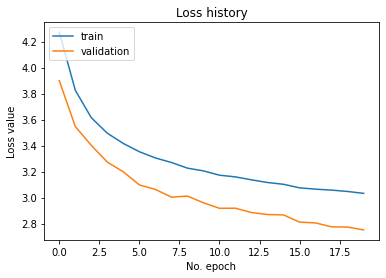

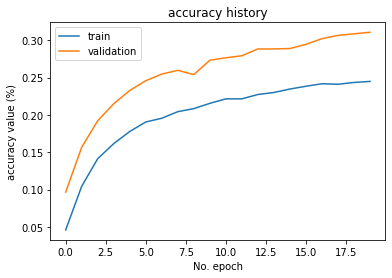

In [6]:
# capas de la red
input = Input(shape=(32,32,3))
layer = input
layer = Conv2D(filters=10, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
layer = MaxPooling2D((2, 2))(layer)
layer = Conv2D(filters=20, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
layer = MaxPooling2D((2, 2))(layer)
layer = Conv2D(filters=30, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
layer = MaxPooling2D((2, 2))(layer)
layer = Flatten()(layer)
layer = Dropout(0.7)(layer)
layer = Dense(units=50, activation='relu')(layer)
output = Dense(units=100, activation='softmax')(layer)

# creamos el modelo
model = Model(inputs=input, outputs=output)
print(model.summary())

# optimizador
optimizer = Adam(learning_rate=0.001)

# función loss
loss = SparseCategoricalCrossentropy(from_logits=False)

# métrica
metrics = ['accuracy']

# compilamos el modelo
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

history = model.fit(x=X_train_cifar100, y=y_train_cifar100, batch_size=50, epochs=20,
                    validation_data=(X_validation_cifar100, y_validation_cifar100))

show_history(history)

# Modelo 4: Agrego Early Stopping

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 32, 32, 10)        280       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 16, 16, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 20)        1820      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 8, 8, 20)         0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 8, 8, 30)          5430

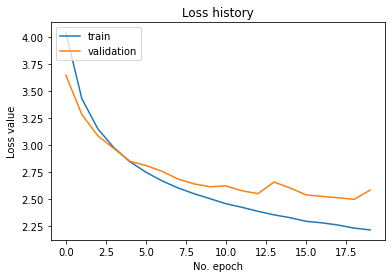

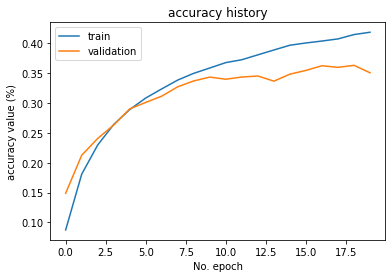

In [23]:
# capas de la red
input = Input(shape=(32,32,3))
layer = input
layer = Conv2D(filters=10, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
layer = MaxPooling2D((2, 2))(layer)
layer = Conv2D(filters=20, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
layer = MaxPooling2D((2, 2))(layer)
layer = Conv2D(filters=30, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
layer = MaxPooling2D((2, 2))(layer)
layer = Flatten()(layer)
layer = Dense(units=50, activation='relu')(layer)
output = Dense(units=100, activation='softmax')(layer)

# creamos el modelo
model = Model(inputs=input, outputs=output)
print(model.summary())

# optimizador
optimizer = Adam(learning_rate=0.001)

# función loss
loss = SparseCategoricalCrossentropy(from_logits=False)

# métrica
metrics = ['accuracy']

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', restore_best_weights=True)

# compilamos el modelo
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)


history = model.fit(x=X_train_cifar100, y=y_train_cifar100, batch_size=50, epochs=20,
                    validation_data=(X_validation_cifar100, y_validation_cifar100), callbacks=[early_stopping])

show_history(history)

# Modelo 5: Agrego BatchNormalization

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 32, 32, 10)        280       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 10)       40        
 ormalization)                                                   
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 16, 16, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 16, 16, 20)        1820      
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 20)       80  

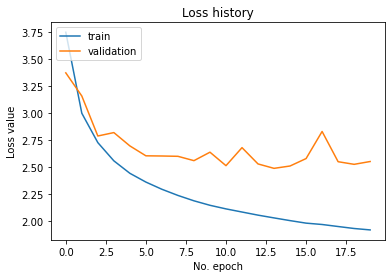

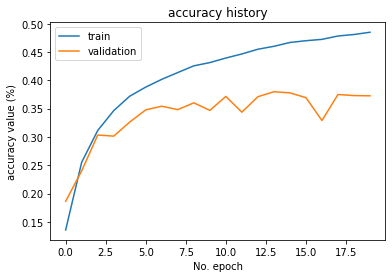

In [24]:
# capas de la red
input = Input(shape=(32,32,3))
layer = input
layer = Conv2D(filters=10, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
layer = BatchNormalization()(layer)
layer = MaxPooling2D((2, 2))(layer)
layer = Conv2D(filters=20, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
layer = BatchNormalization()(layer)
layer = MaxPooling2D((2, 2))(layer)
layer = Conv2D(filters=30, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
layer = BatchNormalization()(layer)
layer = MaxPooling2D((2, 2))(layer)
layer = Flatten()(layer)
layer = Dense(units=50, activation='relu')(layer)
output = Dense(units=100, activation='softmax')(layer)

# creamos el modelo
model = Model(inputs=input, outputs=output)
print(model.summary())

# optimizador
optimizer = Adam(learning_rate=0.001)

# función loss
loss = SparseCategoricalCrossentropy(from_logits=False)

# métrica
metrics = ['accuracy']

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', restore_best_weights=True)

# compilamos el modelo
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)


history = model.fit(x=X_train_cifar100, y=y_train_cifar100, batch_size=50, epochs=20,
                    validation_data=(X_validation_cifar100, y_validation_cifar100), callbacks=[early_stopping])

show_history(history)

# Modelo 6: Prolongo el entrenamiento del mejor modelo

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 10)        280       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 10)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 20)        1820      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 20)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 30)          5430

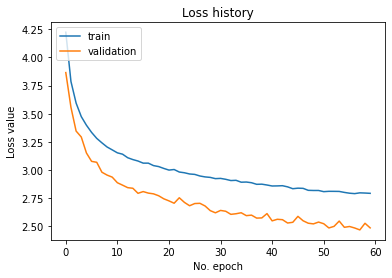

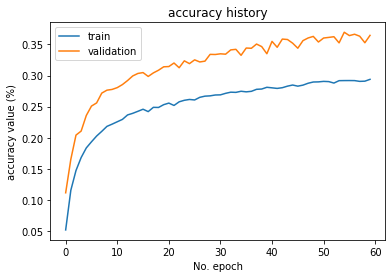

In [10]:
# capas de la red
input = Input(shape=(32,32,3))
layer = input
layer = Conv2D(filters=10, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
layer = MaxPooling2D((2, 2))(layer)
layer = Conv2D(filters=20, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
layer = MaxPooling2D((2, 2))(layer)
layer = Conv2D(filters=30, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
layer = MaxPooling2D((2, 2))(layer)
layer = Flatten()(layer)
layer = Dropout(0.7)(layer)
layer = Dense(units=50, activation='relu')(layer)
output = Dense(units=100, activation='softmax')(layer)

# creamos el modelo
model = Model(inputs=input, outputs=output)
print(model.summary())

# optimizador
optimizer = Adam(learning_rate=0.001)

# función loss
loss = SparseCategoricalCrossentropy(from_logits=False)

# métrica
metrics = ['accuracy']

# compilamos el modelo
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

history = model.fit(x=X_train_cifar100, y=y_train_cifar100, batch_size=50, epochs=60,
                    validation_data=(X_validation_cifar100, y_validation_cifar100))

show_history(history)